# Import packages

In [1]:
import seml
import seaborn as sns
import matplotlib.pyplot as plt
from utils import load_seml, dataset_map, model_palette
import os
import matplotlib as mpl

/opt/modules/i12g/anaconda/envs/poisson_atac_new/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[rank: 0] Global seed set to 0
/data/nasif12/home_if12/martensl/github_repos/scatac_poisson_private/poisson_atac/utils.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use("seaborn-poster")
/opt/modules/i12g/anaconda/envs/poisson_atac_new/lib/python3.8/site-packages/scvelo/settings.py:91: MatplotlibDeprecationWarning: mplDeprecation was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead

In [2]:
import scvelo as scv
scv.set_figure_params()

In [3]:
fig_path = '/data/ceph/hdd/project/node_08/poisson_atac/panels/revision2/Figure2/high_counts'

In [4]:
results = load_seml('omit_high_counts')

100%|██████████| 60/60 [00:00<00:00, 8283.95it/s]


In [5]:
results['config.model.model_type'].cat.remove_unused_categories(inplace=True)

In [6]:
df = results.loc[:, ['config.data.dataset', 'config.scvi.seed', 'config.model.model_type', 'result.average_precision', 'result.average_precision_low_counts']]

In [7]:
df = df.melt(id_vars = ['config.data.dataset', 'config.model.model_type', 'config.scvi.seed'], var_name='type', value_name='average_precision').reset_index()

In [8]:
df.type = df.type.map({'result.average_precision': 'All counts', 'result.average_precision_low_counts': 'Excluding high counts\nn>10'})

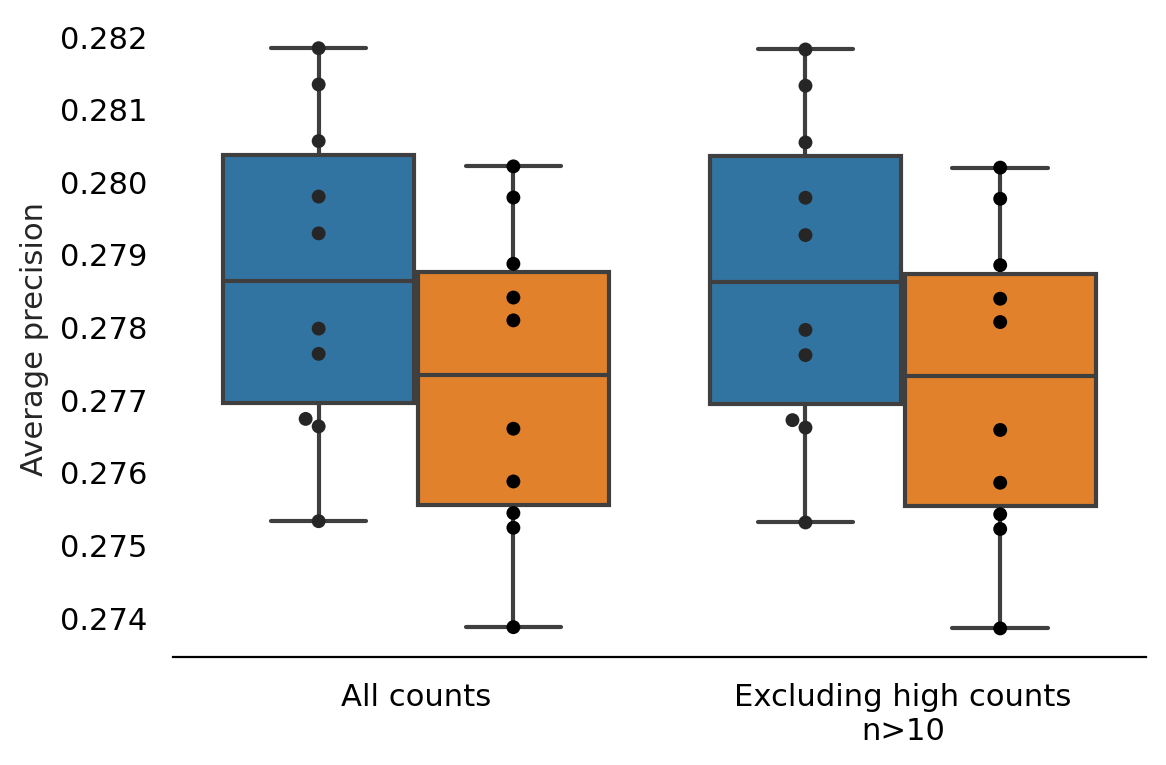

In [23]:
with mpl.rc_context(
    {"xtick.major.pad": 0, "xtick.minor.pad": 0, "ytick.major.pad": 0, "ytick.minor.pad": 0}
):
    sns.set_style("whitegrid")
    scv.set_figure_params()
    
    dataset = dataset_map['neurips']
    plt.figure()
    ax = sns.boxplot(
        data=df[df['config.data.dataset'] == dataset], 
        x='type', y='average_precision', 
        hue='config.model.model_type',
        palette=model_palette
    ) 
    sns.swarmplot(
        data=df[df['config.data.dataset'] == dataset], 
        x='type', y='average_precision', 
        hue='config.model.model_type', dodge=True, color='black',
        ax=ax
    ) 

    ax.legend().remove()
    sns.despine(left=True)
    plt.ylabel('Average precision')
    plt.xlabel('')
    plt.tight_layout()

    plt.savefig(os.path.join(fig_path, 'average_precision_comparision.pdf'))
    plt.savefig(os.path.join(fig_path, 'average_precision_comparision.png'))

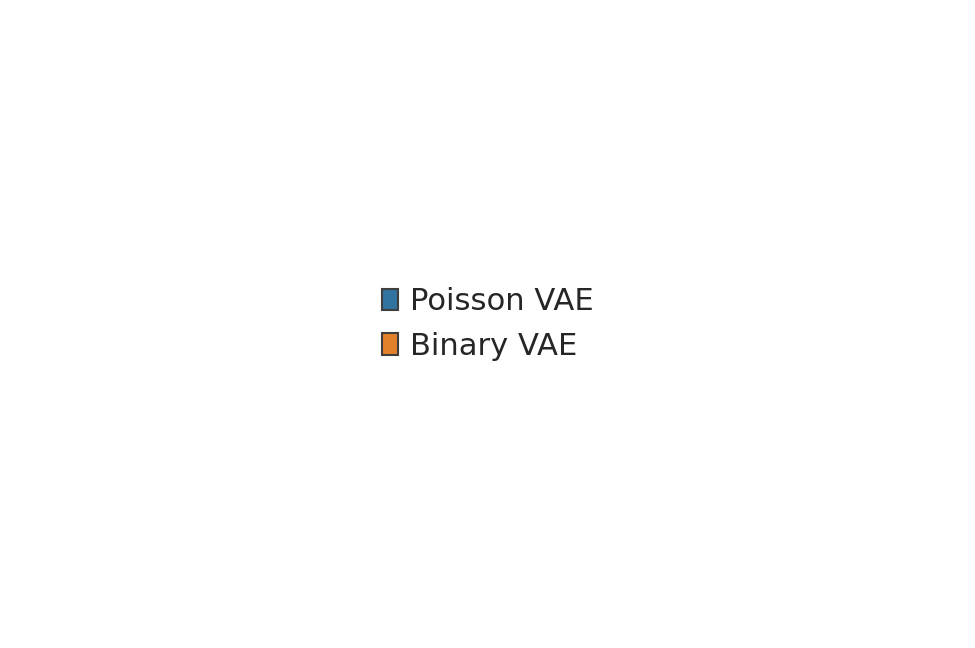

In [22]:
# Plot the legend separately
handles, labels = ax.get_legend_handles_labels()
plt.figure()
plt.axis('off')  # Turn off the axis
plt.legend(handles[:2], labels[:2], ncol=1, loc='center', frameon=False)

# Show the plots
plt.savefig(os.path.join(fig_path, 'legend.pdf'))
plt.savefig(os.path.join(fig_path, 'legend.png'))
plt.show()

In [22]:

df[df['config.data.dataset'] == dataset].groupby(
    ['type', 'config.model.model_type']
).average_precision.median().to_frame()


average_precision
type                        config.model.model_type                   
All counts                  Poisson VAE                       0.278630
                            Binary VAE                        0.277342
Excluding high counts\nn>10 Poisson VAE                       0.278609
                            Binary VAE                        0.277321